In [1]:
# import module
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# import plotting librarbies
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white',color_codes=True,font_scale=1.5)
# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# model building
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso

# model validation
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score ,GridSearchCV

In [2]:
# read the dataset
df_insurance = pd.read_csv('insurance.csv')
display(df_insurance.shape)

(1338, 7)

In [3]:
#look at head of data
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# separate the dependent and indepent variable
X =df_insurance.drop('charges',axis=1)
y =df_insurance.charges

In [5]:
display(X.shape)
print()
display(y.shape)

(1338, 6)

(1338,)

In [6]:
# distinct value in categorical varaible
X.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
X.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
X.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
#check the data type
X.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [10]:
X.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
# now convert categorical variable to numerical variable
cat = X[['sex','smoker','region']]

In [12]:
for i in cat:
    X[i] =pd.get_dummies(X[i])


In [13]:
X[X['region']==1]

,age,sex,bmi,children,smoker,region
8,37,0,29.830,2,1,1
10,25,0,26.220,0,1,1
16,52,1,30.780,1,1,1
17,23,0,23.845,0,1,1
20,60,1,36.005,0,1,1
...,...,...,...,...,...,...
1321,62,0,26.695,0,0,1
1325,61,0,33.535,0,1,1
1326,42,1,32.870,0,1,1
1328,23,1,24.225,2,1,1


In [14]:
# now standardize the continours variable
stndr_sclr = StandardScaler()
X[['age','bmi']] =stndr_sclr.fit_transform(X[['age','bmi']])

In [15]:
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,1,-0.453320,0,0,0
1,-1.509965,0,0.509621,1,1,0
2,-0.797954,0,0.383307,3,1,0
3,-0.441948,0,-1.305531,0,1,0
4,-0.513149,0,-0.292556,0,1,0


In [16]:
# check for null value
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null float64
sex         1338 non-null uint8
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null uint8
region      1338 non-null uint8
dtypes: float64(2), int64(1), uint8(3)
memory usage: 35.4 KB


In [17]:
X.isnull().sum() # checking for null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

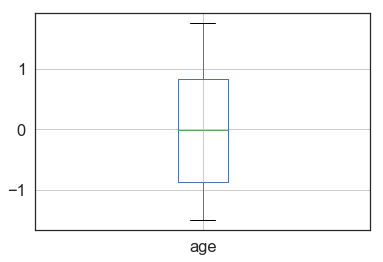

In [18]:
# check for outlier 
X.boxplot('age')

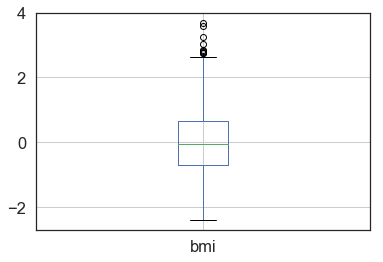

In [19]:
X.boxplot('bmi') # there is outlier in this case 

In [20]:
# check for correlation 
df_insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


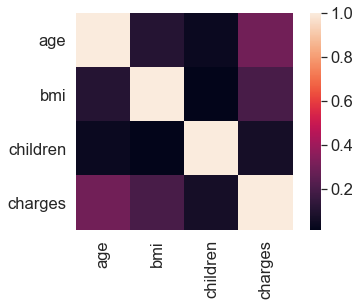

In [21]:
# heatmap for corr()
sns.heatmap(df_insurance.corr(),square=True)

In [22]:
# model building 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
# display the shape of train and test 
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1070, 6)

(268, 6)

(1070,)

(268,)

In [24]:
# instantiate the model
LR = LinearRegression()
# fit the training data to model
LR.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
LR.intercept_ # intercpet B0 

31545.120355595274

In [26]:
LR.coef_

array([  3649.84673694,    252.8337648 ,   2091.76276322,    546.2337419 ,
       -24086.7606561 ,    564.65726037])

In [27]:
# interpretation
#equation
#y =LR.intercept_ + 3649.84 * age + 252.833*sex + 2091.76 * bmi + 546.233 * children  -24086.76 *smoker + 564.65 * region
#by looking at coefficient lager the value more effective
#in this case smoker coefficient is -24086.79 means 1 unit increase in smoker will decrease  the -24086.79 times in y predicter

In [28]:
y_predict = LR.predict(X_test)

In [29]:
#r2_score ,mean absolute error
r2_score(y_test,y_predict)

0.6949114063180178

In [30]:
# mean absolute error
mean_absolute_error(y_test, y_predict)

4538.025700609311

In [31]:
# over come from underfitting and overfitting we use ridge and lasso
RR = Ridge(alpha=100)
# fit the training data
RR.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
RR.intercept_

24846.79808474073

In [33]:
RR.coef_

array([  3302.95715956,   -246.32204573,   1959.18803682,    488.41894731,
       -15218.17826458,    310.32481565])

In [34]:
# now predict
y_predict_rr = RR.predict(X_test)

In [35]:
#model validation
r2_score(y_test,y_predict_rr)

0.6290747494898167

In [36]:
print('score for Linear regression training ' , LR.score(X_train,y_train))
print(' ')
print('score for Linear regression testing ' , LR.score(X_test,y_test))
print()
print('score for Ridge training ' , RR.score(X_train,y_train))
print(' ')
print('score for Ridge testing ' , RR.score(X_test,y_test))

score for Linear regression training  0.7632598605811198
 
score for Linear regression testing  0.6949114063180178

score for Ridge training  0.6772110052228559
 
score for Ridge testing  0.6290747494898167
